# PySPEDAS/PyTplot for Solar Physicists

**By Eric Grimes, UCLA - Earth, Planetary, and Space Sciences; egrimes@igpp.ucla.edu**

- PySPEDAS: https://pyspedas.readthedocs.io/
- PyTplot: https://pytplot.readthedocs.io/


This notebook is available online at:

https://colab.research.google.com/drive/1OOobvI53Qgb6HszUc1pFsF9BmLYQGVN7?usp=sharing


A little history: 
- `tplot` started as an IDL project in 1995, by Davin Larson, and is the core of SPEDAS (and now PySPEDAS)
- in 2017, some developers on the MAVEN team created an initial Python version, using Qt as a back-end for creating figures
- in late 2021, development began on a `matplotlib` version, which is what we're using in this notebook
- it has primarily been used in Magnetospheric Physics, but I'm sure it's also going to be useful for timeseries data in other areas of Heliophysics

The following line installs pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [ ]:
!pip install pyspedas

In [ ]:
import pyspedas
from pytplot import tplot

### Setting your local data directory

By default, data files are saved in a subfolder of your current working directory; you can change this by setting the `SPEDAS_DATA_DIR` environment variable. Directories for individual missions can also be changed from the default with mission-specific environment variables, e.g., `PSP_DATA_DIR` or `SOLO_DATA_DIR`

### Load some Parker Solar Probe FIELDS data

#### Set a timespan for four days near perihelion 2

This example time range was taken from the PSP FIELDS team's IDL example

In [ ]:
trange = ['2019-04-03', '2019-04-07']

### Load the MAG data in RTN coordinates

Note: the load routines in PySPEDAS all follow the form: pyspedas.mission.instrument(), and have the same core keywords for accessing data (trange, level, datatype, etc). 

In [ ]:
variables = pyspedas.psp.fields(datatype='mag_rtn_4_sa_per_cyc', trange=trange)

05-Apr-22 23:05:31: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
05-Apr-22 23:05:31: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf to psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
05-Apr-22 23:05:31: Download complete: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
05-Apr-22 23:05:31: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190404_v02.cdf to psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190404_v02.cdf
05-Apr-22 23:05:32: Download complete: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190404_v02.cdf
05-Apr-22 23:05:32: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/psp

['psp_fld_l2_mag_RTN_4_Sa_per_Cyc']

To find the supported load routines and keywords, see our documentation: https://pyspedas.readthedocs.io/

You can also see the supported options by calling `help` on the load routine you're interested in

In [ ]:
help(pyspedas.solo.mag)

Help on function mag in module pyspedas.solo:

mag(trange=['2020-06-01', '2020-06-02'], datatype='rtn-normal', level='l2', suffix='', get_support_data=False, varformat=None, varnames=[], downloadonly=False, notplot=False, no_update=False, time_clip=False)
    This function loads data from the Magnetometer (MAG)
    
    Parameters
    ----------
        trange : list of str
            time range of interest [starttime, endtime] with the format 
            'YYYY-MM-DD','YYYY-MM-DD'] or to specify more or less than a day 
            ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
    
        datatype: str
            Data type; Valid options:
              'rtn-normal': RTN Coordinates in Normal Mode
              'rtn-normal-1-minute': Same as above, but at 1-min resolution
              'rtn-burst': RTN Coordinates in Burst Mode
              'srf-normal': Spacecraft Reference Frame in Normal Mode
              'srf-burst': Spacecraft Reference Frame in Burst Mode 
    
        level

Note: most load routines have some reasonable defaults for every keyword (including trange), so simply calling `pyspedas.mission.instrument()` should load some data, e.g., 

In [ ]:
pyspedas.solo.mag()

05-Apr-22 23:05:39: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/
05-Apr-22 23:05:39: Downloading https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200601_v02.cdf to solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200601_v02.cdf
05-Apr-22 23:05:40: Download complete: solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200601_v02.cdf


['B_RTN']

And we can now plot it:

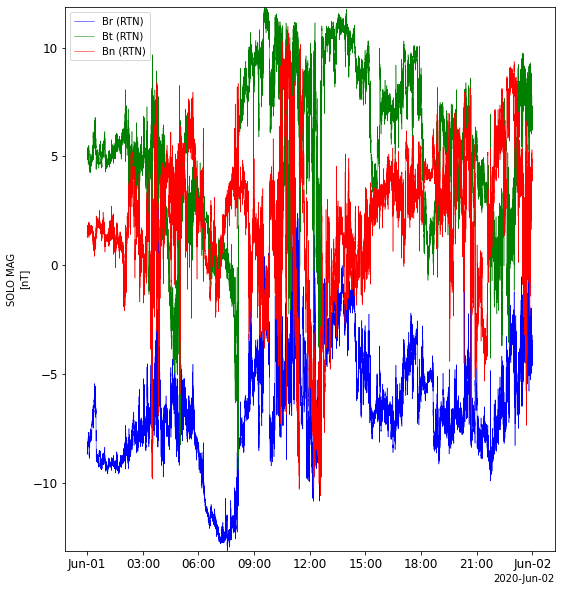

In [ ]:
tplot('B_RTN')

### PSP Radio Frequency Spectrometer (RFS) HFR and LFR data

Note: specifying the variable names with the varnames keyword isn't required, but does speed up loading these data

In [ ]:
pyspedas.psp.fields(datatype='rfs_hfr', trange=trange, varnames='psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2')
pyspedas.psp.fields(datatype='rfs_lfr', trange=trange, varnames='psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2')

05-Apr-22 23:05:53: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/
05-Apr-22 23:05:54: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v02.cdf to psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v02.cdf
05-Apr-22 23:05:54: Download complete: psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v02.cdf
05-Apr-22 23:05:54: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190404_v02.cdf to psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190404_v02.cdf
05-Apr-22 23:05:55: Download complete: psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190404_v02.cdf
05-Apr-22 23:05:55: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190405_v02.cdf to psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190405_v02.cdf
05-Apr-22 23:05:56: Download complete: psp_data/fields/l2/rfs_hfr/2019

['psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2']

You can use the `xsize` and `ysize` options to change the figure size

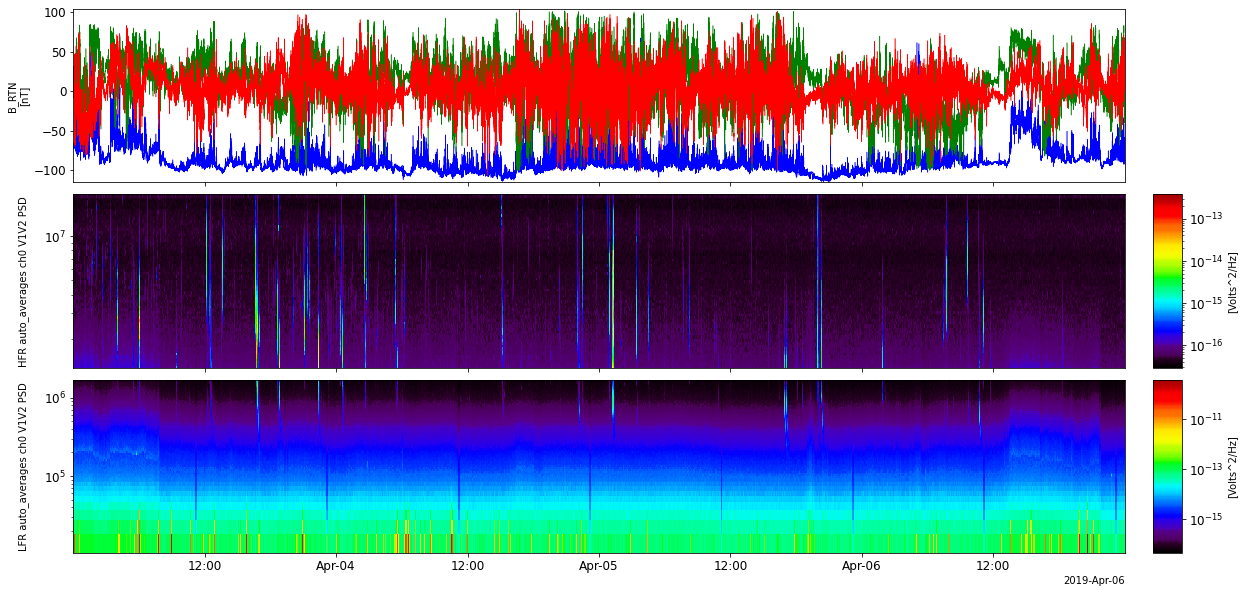

In [ ]:
tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
       'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
       'psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'], xsize=20)

Return the data in `numpy` arrays

In [ ]:
from pytplot import get_data

data = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')

The time values are stored in `data.times` (as unix times)

In [ ]:
data.times

array([1.5542496e+09, 1.5542496e+09, 1.5542496e+09, ..., 1.5545952e+09,
       1.5545952e+09, 1.5545952e+09])

The data values (for a simple line plot) are stored in `data.y`

In [ ]:
data.y

array([[-68.48057  ,  24.101665 ,  -2.508148 ],
       [-68.432144 ,  24.598341 ,  -1.9882753],
       [-68.27809  ,  25.49397  ,  -1.8627083],
       ...,
       [-85.62291  ,  -6.7592106,  30.901932 ],
       [-84.878944 ,  -7.3238993,  32.606995 ],
       [-85.198906 ,  -3.1285264,  32.59051  ]], dtype=float32)

You can then use the `numpy` `ndarray` methods to work with these data, e.g., to find the shape of the data:

In [ ]:
data.y.shape

(1582027, 3)

You can convert from unix times to strings using `time_string`

In [ ]:
from pyspedas import time_string

time_string(data.times[0])

'2019-04-03 00:00:00.075775'

And convert back using `time_double`

In [ ]:
from pyspedas import time_double

time_double('2019-04-03 00:00:00.075775')

1554249600.075775

And convert to datetime objects using `time_datetime`

In [ ]:
from pyspedas import time_datetime

time_datetime(data.times[0])

datetime.datetime(2019, 4, 3, 0, 0, 0, 75775, tzinfo=datetime.timezone.utc)

For spectra variables, `data.y` contains the data values (z-axis), and  `data.v` contains the y-axis values at each point

In [ ]:
rfs_data = get_data('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2')

In [ ]:
rfs_data.y

array([[1.4241522e-16, 1.2002528e-16, 1.1531492e-16, ..., 4.1675483e-17,
        5.2248089e-17, 5.5130728e-17],
       [1.3988928e-16, 1.3030286e-16, 1.1411372e-16, ..., 3.7384977e-17,
        4.7942641e-17, 6.0811354e-17],
       [1.2689870e-16, 1.4484774e-16, 1.1981941e-16, ..., 4.8320540e-17,
        5.1633024e-17, 6.9066663e-17],
       ...,
       [6.9643929e-17, 7.2604177e-17, 7.0270032e-17, ..., 3.7698915e-17,
        4.9464114e-17, 6.5470293e-17],
       [7.3432846e-17, 7.4527471e-17, 7.4414161e-17, ..., 4.8399026e-17,
        5.2863154e-17, 6.1260904e-17],
       [7.5297239e-17, 7.1101607e-17, 6.3363147e-17, ..., 4.1884777e-17,
        4.8169242e-17, 6.2078257e-17]], dtype=float32)

In [ ]:
rfs_data.y.shape

(49436, 64)

In [ ]:
rfs_data.v

array([[ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       ...,
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.],
       [ 1275000.,  1321875.,  1378125., ..., 17625000., 18375000.,
        19171876.]], dtype=float32)

In [ ]:
rfs_data.v.shape

(49436, 64)

The metadata for a variable can be obtained using the `metadata` option in `get_data`

In [ ]:
metadata = get_data('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', metadata=True)

metadata

{'CDF': {'FILENAME': 'psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190406_v02.cdf',
  'GATT': {'Data_type': 'L2>Level 2 Data',
   'Data_version': '02',
   'Dependencies': 'None',
   'Descriptor': 'RFS_HFR>Radio Frequency Spectrometer HFR',
   'Discipline': ['Solar Physics>Heliospheric Physics',
    'Space Physics>Interplanetary Studies'],
   'File_naming_convention': 'source_datatype_descriptor_yyyyMMdd',
   'Generated_by': 'PSP FIELDS SOC',
   'Generation_date': 'Thu Jan 30 19:00:36 2020',
   'HTTP_LINK': 'http://fields.ssl.berkeley.edu/data/',
   'Instrument_type': ['Radio and Plasma Waves (space)',
    'Electric Fields (space)',
    'Magnetic Fields (space)'],
   'LINK_TEXT': 'PSP/FIELDS SOC',
   'LINK_TITLE': 'PSP/FIELDS RFS HFR and LFR data available at',
   'Logical_file_id': 'psp_fld_l2_rfs_hfr_20190406_v02',
   'Logical_source': 'psp_fld_l2_rfs_hfr',
   'Logical_source_description': 'PSP FIELDS RFS HFR Data',
   'MODS': ['Revision 1', "Revision 2: Corrected 'Instrument_

You can create new `tplot` variables using `store_data`

In [ ]:
from pytplot import store_data

store_data('mag_rtn', data={'x': data.times, 'y': data.y})

True

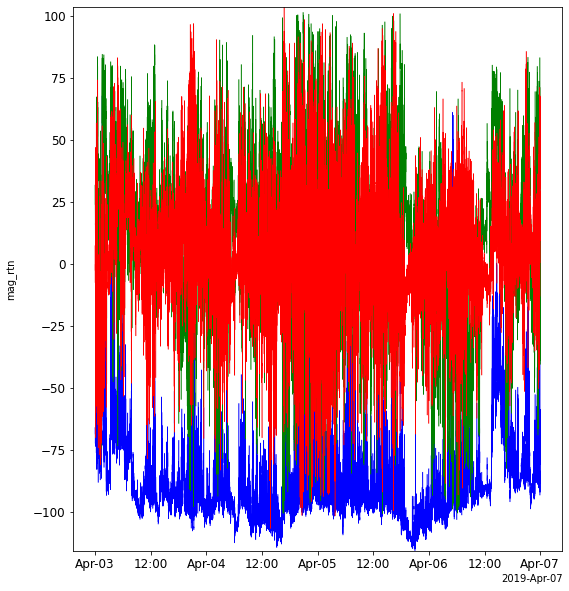

In [ ]:
tplot('mag_rtn')

To find the names of all of the loaded `tplot` variables, use `tplot_names`

In [ ]:
from pytplot import tplot_names

variables = tplot_names()

0 : psp_fld_l2_mag_RTN_4_Sa_per_Cyc
1 : B_RTN
2 : psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2
3 : psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2
4 : mag_rtn


['psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
 'B_RTN',
 'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
 'psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2',
 'mag_rtn']

To change the plot options, use the `options` function in `pytplot`

In [ ]:
from pytplot import options

help(options)

Help on function options in module pytplot.options:

options(name, option=None, value=None, opt_dict=None)
    This function allows the user to set a large variety of options for individual plots.
    
    Parameters:
        name : str
            Name or number of the tplot variable
        option : str
            The name of the option.  See section below.
        value : str/int/float/list
            The value of the option.  See section below.
        dict : dict
            This can be a dictionary of option:value pairs.  Option and value
            will not be needed if this dictionary item is supplied.
    
    Options:
        =================== ==========   =====
        Options             Value type   Notes
        =================== ==========   =====
        Color               str/list     red, green, blue, etc.  Also takes in RGB tuples, i.e. (0,255,0) for green
        Colormap            str/list     https://matplotlib.org/examples/color/colormaps_reference.html.

For example:

05-Apr-22 23:07:42: /usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)



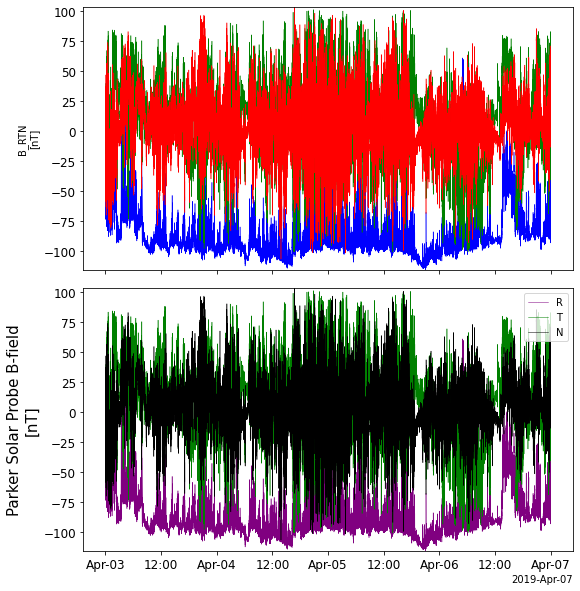

In [ ]:
options('mag_rtn', 'color', ['purple', 'green', 'black'])
options('mag_rtn', 'legend_names', ['R', 'T', 'N'])
options('mag_rtn', 'ytitle', 'Parker Solar Probe B-field')
options('mag_rtn', 'ysubtitle', '[nT]')
options('mag_rtn', 'char_size', 15)

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'mag_rtn'])

Note: `options` changes panel-level options, figure-level options can be set with `tplot_options`, e.g., 


Note: not all of these options are supported by the `matplotlib` version yet; if you find one that isn't working, please let us know and we'll prioritize it


In [ ]:
from pytplot import tplot_options

help(tplot_options)

Help on function tplot_options in module pytplot.tplot_options:

tplot_options(option, value)
    This function allows the user to set GLOBAL options for the generated plots.
    
    Parameters:
        option : str
            The name of the option.  See section below  
        value : str/int/float/list
            The value of the option.  See section below.  
            
    Options:
        ================  ==========   =====
        Options           Value type   Notes
        ================  ==========   =====
        title             str          Title of the the entire output
        title_size        int          Font size of the output
        wsize             [int, int]   [height, width], pixel size of the plot window
        title_align       int          Offset position in pixels of the title
        var_label         srt          Name of the tplot variable to be used as another x axis
        alt_range         [flt, flt]   The min and max altitude to be plotted o

05-Apr-22 23:08:35: /usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)



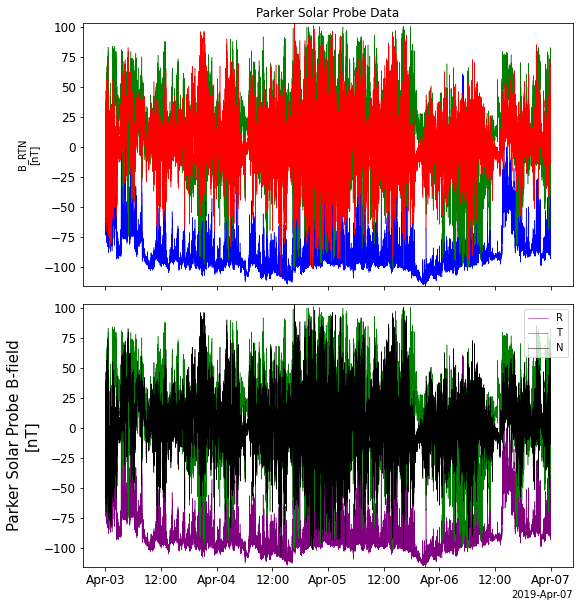

In [ ]:
tplot_options('title', 'Parker Solar Probe Data')

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'mag_rtn'])

You can save figures using keywords to `tplot`, e.g., to save a PNG file:

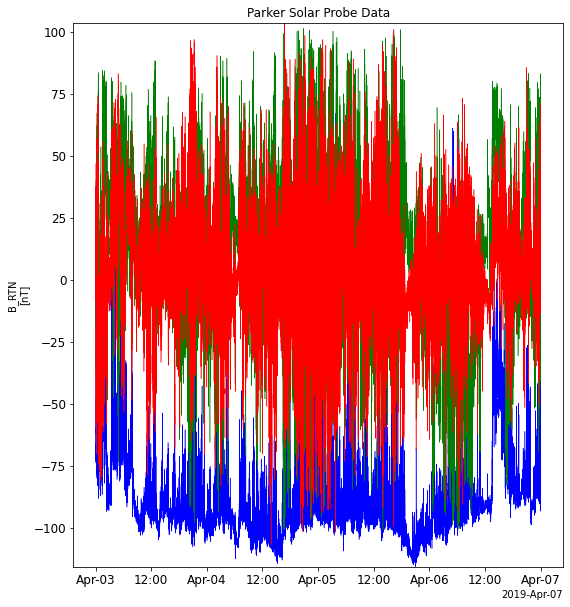

In [ ]:
tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', save_png='figure')

To save the figure as a postscript file:

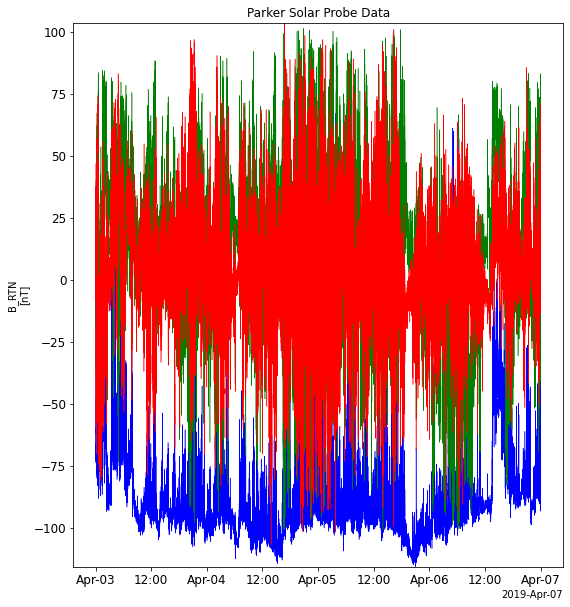

In [ ]:
tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', save_eps='figure')

Or save as a PDF:

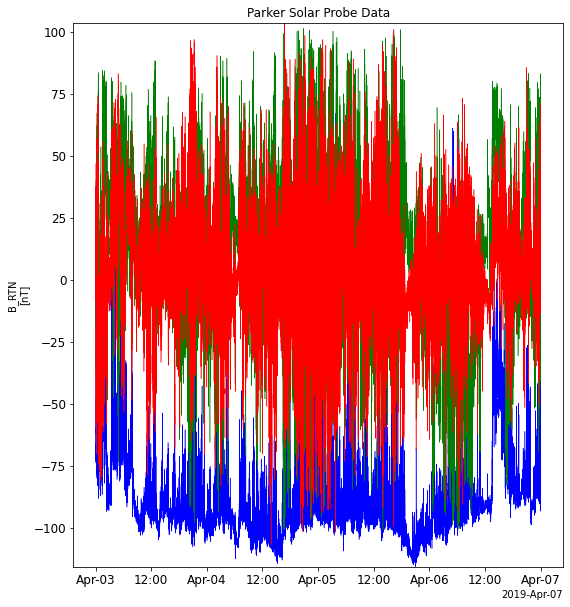

In [ ]:
tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', save_pdf='figure')

Note: you can have full control over the figures and axes by returning the objects using the `return_plot_objects` keyword, e.g., 

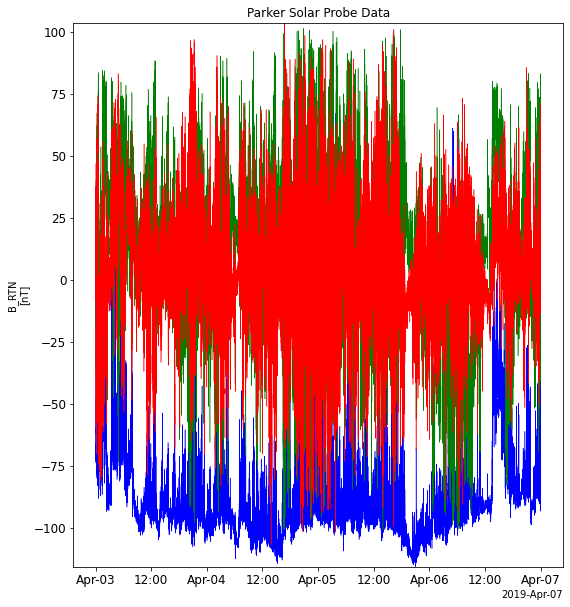

In [ ]:
fig, axes = tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', return_plot_objects=True)

In [ ]:
axes

For example, to add some text to a figure:

In [ ]:
from datetime import datetime, timezone
import matplotlib

time = matplotlib.dates.date2num(datetime(2019, 4, 6, 13, 0, 0, tzinfo=timezone.utc))
axes.annotate('Your text', (time, -110), fontsize='x-large')

Text(737155.5416666666, -110, 'Your text')

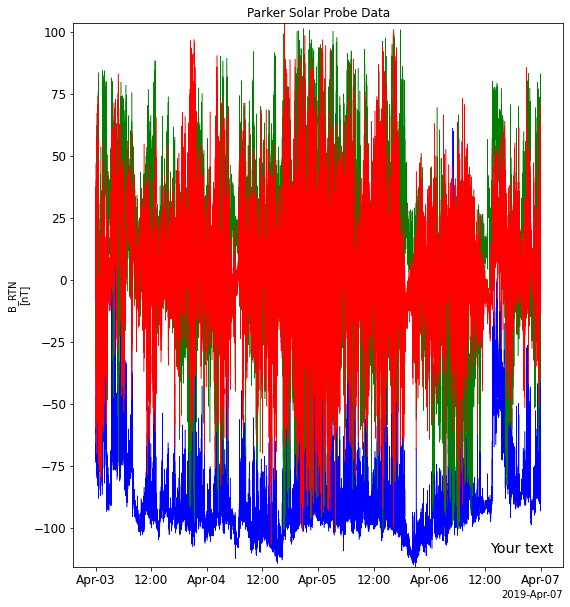

In [ ]:
fig